In [1]:
import pandas as pd

In [115]:
df = pd.read_csv("./data/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [116]:
df.describe().T
# df.describe(include="all").T  we gets all columns statics even strings

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [118]:
df.shape

(344, 7)

In [119]:
df.corr() 
# The Pearson correlation coefficient of each column with all the other columns is calculated and a correlation matrix is generated as a result. 
# This matrix shows how related the columns in the data set are to each other.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
# !pip install seaborn

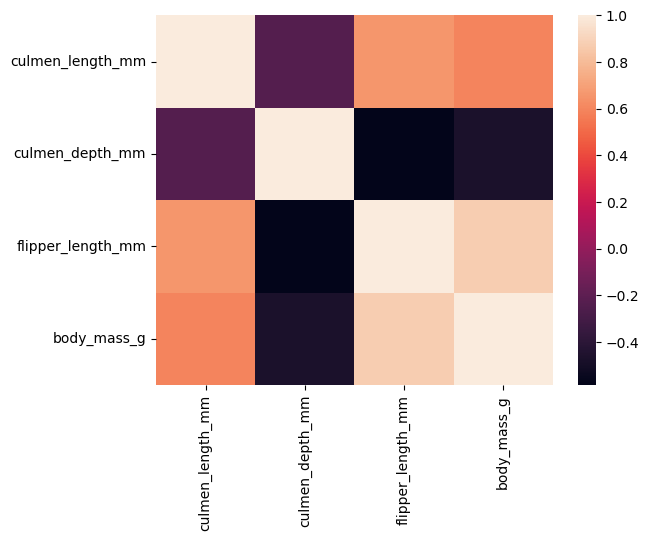

In [122]:
sns.heatmap(df.corr());

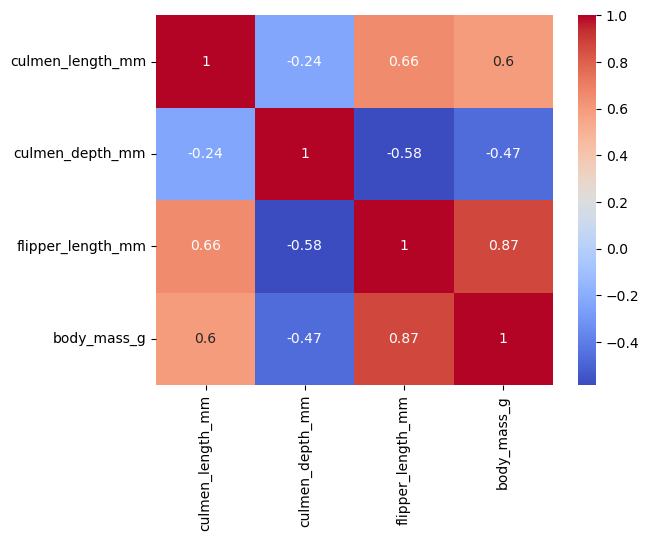

In [123]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm");

In [124]:
df.isna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [125]:
nan_count = df.isna().sum()
nan_count

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [126]:
df.count()

species              344
island               344
culmen_length_mm     342
culmen_depth_mm      342
flipper_length_mm    342
body_mass_g          342
sex                  334
dtype: int64

In [127]:
nan_percantage =  df.isna().sum() / df.count() * 100 
nan_percantage
# we found what percentage is null => sex : %3 null rows

species              0.000000
island               0.000000
culmen_length_mm     0.584795
culmen_depth_mm      0.584795
flipper_length_mm    0.584795
body_mass_g          0.584795
sex                  2.994012
dtype: float64

In [128]:
nan_table = pd.concat([df.count(),nan_count,nan_percantage], axis = 1)
nan_table.columns = ["Count","Nan-Count", "Percantage"]
nan_table

,Count,Nan-Count,Percantage
species,344,0,0.000000
island,344,0,0.000000
culmen_length_mm,342,2,0.584795
culmen_depth_mm,342,2,0.584795
flipper_length_mm,342,2,0.584795
body_mass_g,342,2,0.584795
sex,334,10,2.994012


In [129]:
from sklearn.impute import SimpleImputer

In [130]:
imputer = SimpleImputer(strategy="most_frequent")
# default strategy is "mean"

In [131]:
df.iloc[:,:] = imputer.fit_transform(df)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,MALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [132]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [133]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [134]:
# df["sex"] = df["sex"].replace(["FEMALE","MALE"],["1","0"])
# df

In [135]:
from sklearn.preprocessing import LabelEncoder

In [136]:
le= LabelEncoder()
df["gender"] = le.fit_transform(df["sex"])
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1


In [137]:
df["sex"].value_counts()
# there is one data that has value . so gender became 1 and 2 not 0 and 1

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [138]:
df["gender"].value_counts()

2    178
1    165
0      1
Name: gender, dtype: int64

In [139]:
df["sex"] == "."

0      False
1      False
2      False
3      False
4      False
       ...  
339    False
340    False
341    False
342    False
343    False
Name: sex, Length: 344, dtype: bool

In [140]:
df[df["sex"] == "."]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.,0


In [141]:
df[df["sex"] == "."].index

Int64Index([336], dtype='int64')

In [142]:
row_to_delete =  df[df["sex"] == "."].index
df.drop(row_to_delete, inplace=True)
df["sex"].value_counts()

MALE      178
FEMALE    165
Name: sex, dtype: int64

In [143]:
df = df.drop(["sex"], axis =1)
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,41.1,17.0,190.0,3800.0,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [147]:
species_counts = df["species"].value_counts().reset_index()
species_counts

,index,species
0,Adelie,152
1,Gentoo,123
2,Chinstrap,68


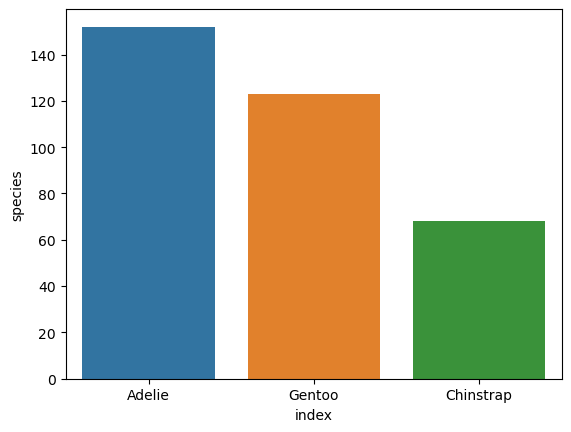

In [149]:
sns.barplot(data=species_counts, x="index",y="species");

In [151]:
df[df["species"] == "Adelie"]["body_mass_g"]

0      3750.0
1      3800.0
2      3250.0
3      3800.0
4      3450.0
        ...  
147    3475.0
148    3450.0
149    3750.0
150    3700.0
151    4000.0
Name: body_mass_g, Length: 152, dtype: float64

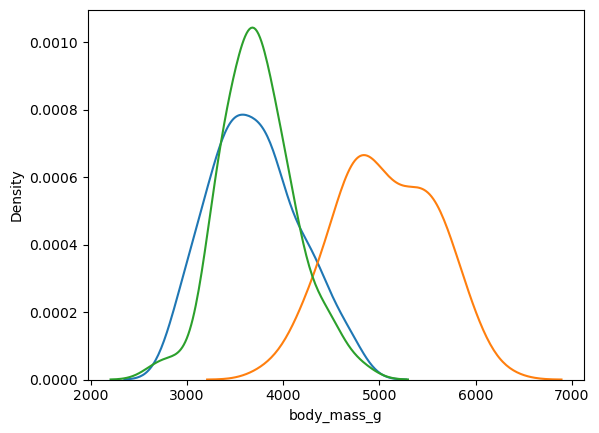

In [154]:
sns.kdeplot(df[df["species"] == "Adelie"]["body_mass_g"]);
sns.kdeplot(df[df["species"] == "Gentoo"]["body_mass_g"]);
sns.kdeplot(df[df["species"] == "Chinstrap"]["body_mass_g"]);

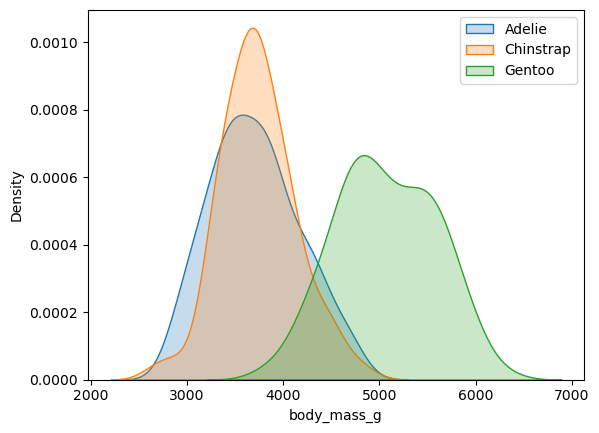

In [169]:
for spec in df["species"].unique():
    sns.kdeplot(df[df["species"] == spec]["body_mass_g"], label=spec, shade=True);
    plt.legend()
     

In [170]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'gender'],
      dtype='object')

In [173]:
for col in df.columns[2:-1]:
    print(col)

culmen_length_mm
culmen_depth_mm
flipper_length_mm
body_mass_g


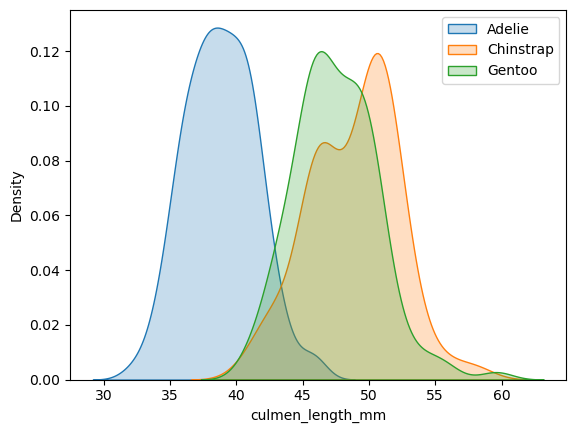

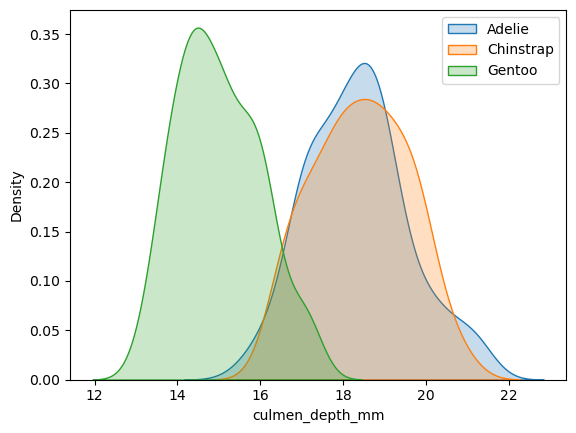

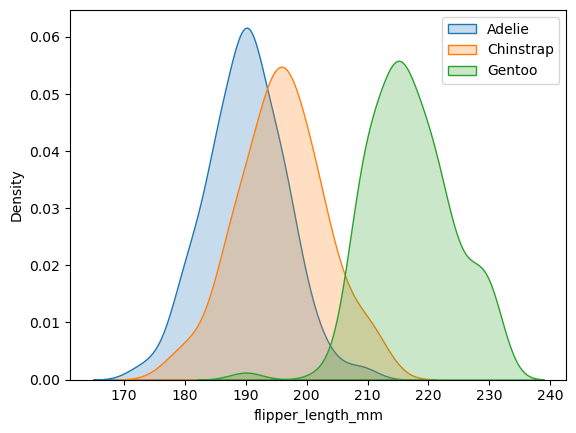

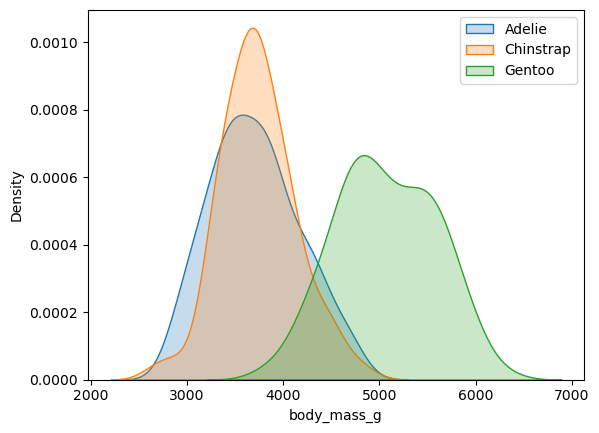

In [176]:
for col in df.columns[2:-1]:
    for spec in df["species"].unique():
        sns.kdeplot(df[df["species"] == spec][col], label=spec, shade=True);
        plt.legend()
    plt.show() # this is important for working well

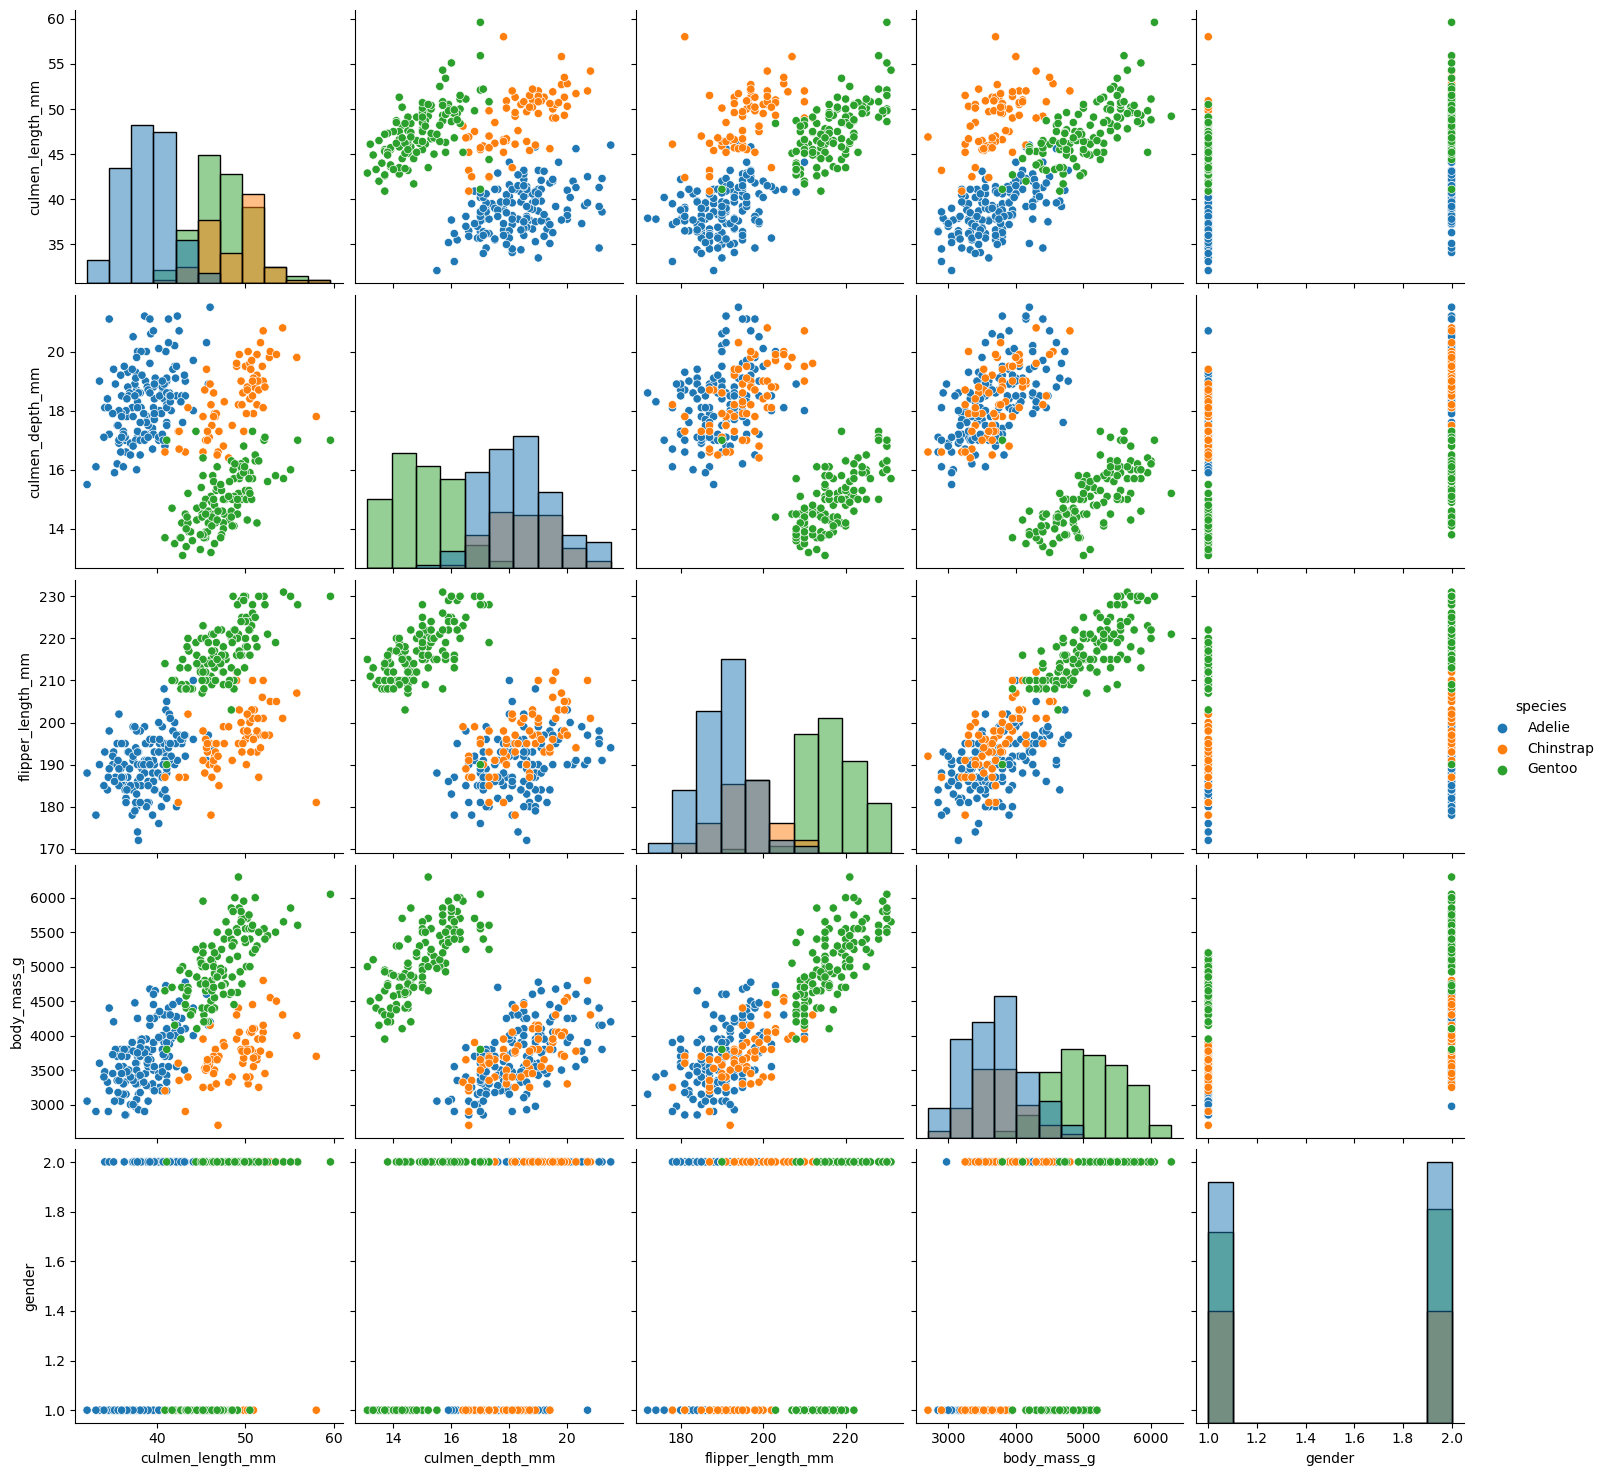

In [178]:
sns.pairplot(df,hue="species",height=3,diag_kind="hist");